In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.io import loadmat
import pandas as pd
from sklearn.metrics import accuracy_score

In [40]:
data = loadmat(os.path.join('ex3data1.mat'))
print(data.keys())
X, y = data['X'], data['y'].reshape(-1) #flatten the y array
y[y==10]=0
print("The Xs in training set: ")
print(X)
print("The ys in training set: ")
print(y)

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
The Xs in training set: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
The ys in training set: 
[0 0 0 ... 9 9 9]


In [16]:
#taken from https://github.com/dibgerge/ml-coursera-python-assignments/blob/master/Exercise3/exercise3.ipynb 
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Displays 2D data stored in X in a nice grid.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = plt.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])

        
def sigmoid(z):
    #compute the sigmoid function
    return 1.0 / (1.0 + np.exp(-z))


5000 400


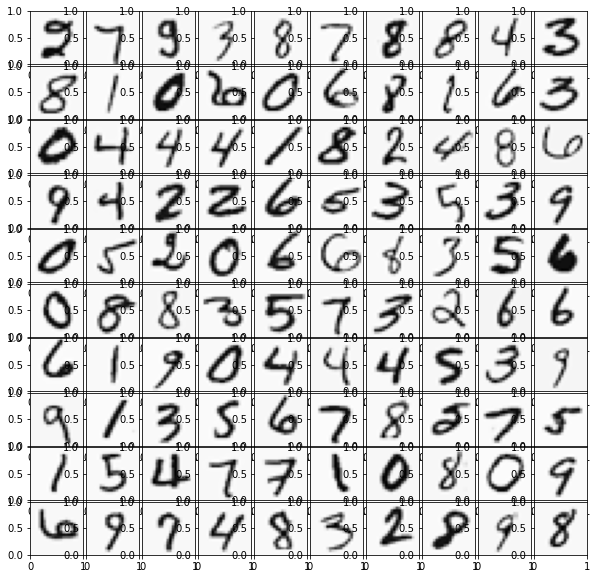

In [6]:
#size of the training set
m,n=X.shape
print(m,n)
# Randomly select 100 data points to display
rand_indices = np.random.choice(m, 100, replace=False)
dis= X[rand_indices, :]
displayData(dis)

In [15]:
#set up parameters
input_layers=n
hidden_layer_units=25
output_layers=10
weights = loadmat('ex3weights.mat')
weights.keys()
Theta1, Theta2=weights['Theta1'], weights['Theta2'] #from trained model
Theta2 = np.roll(Theta2, 1, axis=0)
print(Theta1.shape)
print(Theta2.shape)

(25, 401)
(10, 26)


In [41]:
#Predict the label of an input given a trained neural network
def predict(Theta1 ,Theta2 ,X):  
    if X.ndim == 1:
        X = X[None]
        
    m = X.shape[0]
    p = np.zeros(m)
    for i in range(m):
        #add bias to input layer
        a_1 = np.concatenate((np.ones((1)),X[i]))         
        z_2 = np.dot(Theta1,a_1)
        #add bias to hidden layer
        a_2 = np.concatenate((np.ones(1), sigmoid(z_2)))  
        z_3 = np.dot(Theta2, a_2)
        a_3 = sigmoid(z_3)  
        p[i] = np.argmax(a_3)
      
    return p   

In [42]:
pred = predict(Theta1, Theta2, X)
print('Accuracy: {:.1f}%'.format(accuracy_score(pred,y)*100))

Accuracy: 97.5%


[4.]


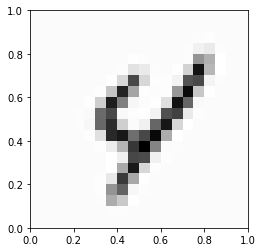

In [39]:
#run the cell to see different predictions
indices=np.random.permutation(m)
displayData(X[indices[0], :],figsize=(4, 4) )
print(predict(Theta1, Theta2, X[indices[0], :]))